In [ ]:
%cd /content/drive/MyDrive/Arash

/content/drive/MyDrive/Arash


In [ ]:
ver= 8
cnn_step= 2

# Change this wether the masks are inspected on not
After_Visual_inspection= True

In [ ]:
from numpy import pi
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import cv2
import glob
from tqdm import tqdm

import skimage
from skimage import morphology
from skimage.morphology import convex_hull_image
from skimage.measure import label, regionprops, regionprops_table
from skimage.feature import canny
from scipy import ndimage as ndi

plt.style.use ('seaborn')

# Load Masks and make a DataFrame of Spheroids Featurse

In [ ]:
def Anomaly_selection():

    return

In [ ]:
if not After_Visual_inspection:
    MASKS= glob.glob(f'**/**_msk{ver}.png')
    Anomaly_selection()
    print (f'Stop runing the rest cells. The folder for anomaly candidates is created. \n Go to the data & mask2_{ver}/anom_ArPeri folders, for visual inspection and removing corrupted masks. \n When this is done, run the remaingn codes, by turning After_Visual_inspection to True')
elif After_Visual_inspection:
    MASKS= glob.glob(f'**/mask{cnn_step}_{ver}/**_msk{ver}.png')
    print(f'Number of Seccessful Masks After Inspection Is: {len(MASKS)}')

1798


In [ ]:
# import shutil
# for m in MASKS:
#     new= m.replace(f'mask{cnn_step}_{ver}', f'data')
#     shutil.copyfile(m, new)

In [ ]:
def name_maker(el):
    return '_'.join(el.astype('str'))

def convex_perimeter (label):
    out1= convex_hull_image(label).astype (int)
    out= regionprops(out1)[0].perimeter
    return out

cols= ['Name','Dir','Den','Day','centroid-0','centroid-1','orientation','major_axis_length','minor_axis_length',
       'eccentricity','solidity','perimeter','perimeter_crofton','area','convex_area','convex_perimeter']

In [ ]:
DF= pd.DataFrame (columns=cols)
for m in tqdm(MASKS):
    msk= np.mean(1-plt.imread(m), axis=-1).astype (bool)
    label_img = label(msk)
    props = regionprops_table(label_img, extra_properties=(convex_perimeter,), 
                                         properties=('centroid', 'orientation', 'major_axis_length', 'minor_axis_length',
                                                     'eccentricity', 'solidity','perimeter', 'perimeter_crofton', 'area', 'convex_area',))
    df= pd.DataFrame(props)
    Dir, Den, Day, Name, _= m.split('/')[-1].split('_')
    df[['Dir', 'Den', 'Day', 'Name', 'fname']]= Dir, Den, Day, Name, m
    DF= pd.concat([DF, df])

DF['Convexity'] = DF.convex_perimeter / DF.perimeter
DF['Compactness']= DF.area * 4*pi / DF.perimeter
DF.index.name='ind'

100%|██████████| 1798/1798 [01:24<00:00, 21.31it/s]


In [ ]:
DF.to_csv(f'RESULTS/Dataframe_CNN{cnn_step}_{ver}.csv', index= 'ind')

# Days Correction

In [ ]:
dataF= pd.read_csv (f'RESULTS/Dataframe_CNN{cnn_step}_{ver}.csv', index_col= 'ind')
dataF['Day']= pd.to_numeric(dataF["Day"])
print (len(dataF), 'rows')
dataF.head (10)

6945 rows


Name    Dir  Den  Day  centroid-0  centroid-1  orientation  \
ind                                                                
0    Tv106  Adipo  2.0   14  208.844052  234.778852    -0.253865   
0    Tv108  Adipo  2.0   14  215.783533  245.374502     0.337278   
0    Tv109  Adipo  2.0   14   59.641304  479.130435     0.037993   
1    Tv109  Adipo  2.0   14  281.053307  214.058008    -1.045976   
0    Tv110  Adipo  2.0   14  282.415537  213.145678    -1.121021   
0    Tv111  Adipo  2.0   14  279.325628  249.519415     1.371947   
0    Tv112  Adipo  2.0   14  279.562829  249.186830    -1.464267   
0    Tv113  Adipo  2.0   14  193.278277  282.516129    -0.481668   
0     Tv46  Adipo  2.0   13  348.487603  392.173554     0.317814   
1     Tv46  Adipo  2.0   13  372.936306  313.751592     1.025809   

     major_axis_length  minor_axis_length  eccentricity  solidity   perimeter  \
ind                                                                             
0           149.758950         106.931896      0.700118  0.813641  541.587878   
0            33.827072          28.392940      0.543583  0.970361  101.012193   
0            18.880992          12.481428      0.750335  0.963351   49.556349   
1           119.058751          98.573547      0.560816  0.909973  407.948268   
0           116.534951          98.193848      0.538520  0.928618  387.362482   
0            87.978261          80.524988      0.402812  0.975167  286.249783   
0            85.008027          77.441390      0.412430  0.976227  275.078210   
0           142.687696          88.901150      0.782184  0.942376  413.889394   
0            23.896317          13.890445      0.813704  0.906367   62.284271   
1            18.292002          10.954166      0.800861  0.951515   46.384776   

     perimeter_crofton   area  convex_area  convex_perimeter  \
ind                                                            
0           516.139023  11273        13855        488.190909   
0            98.447081    753          776        101.012193   
0            49.663882    184          191         49.556349   
1           389.440727   8723         9586        392.149278   
0           369.924178   8560         9218        379.078210   
0           274.063329   5537         5678        282.149278   
0           263.472014   5133         5258        271.563492   
0           395.073268   9796        10395        394.475180   
0            61.730709    242          267         62.284271   
1            46.657043    157          165         46.384776   

                                       fname  Convexity  Compactness  
ind                                                                   
0    Adipo/mask2_8/Adipo_2_14_Tv106_msk8.png   0.901407   261.565485  
0    Adipo/mask2_8/Adipo_2_14_Tv108_msk8.png   1.000000    93.676583  
0    Adipo/mask2_8/Adipo_2_14_Tv109_msk8.png   1.000000    46.658243  
1    Adipo/mask2_8/Adipo_2_14_Tv109_msk8.png   0.961272   268.701841  
0    Adipo/mask2_8/Adipo_2_14_Tv110_msk8.png   0.978614   277.693730  
0    Adipo/mask2_8/Adipo_2_14_Tv111_msk8.png   0.985675   243.074399  
0    Adipo/mask2_8/Adipo_2_14_Tv112_msk8.png   0.987223   234.490330  
0    Adipo/mask2_8/Adipo_2_14_Tv113_msk8.png   0.953093   297.422858  
0     Adipo/mask2_8/Adipo_2_13_Tv46_msk8.png   1.000000    48.825516  
1     Adipo/mask2_8/Adipo_2_13_Tv46_msk8.png   1.000000    42.533787

In [ ]:
def name_maker(el):
    return '_'.join(el.astype('str'))

def cnt(el, data):
    dys= np.zeros(21, dtype=int)
    df= data[data.uName==el].sort_values(by='Day')
    days= df.Day.unique()

    for d in days:
        x= max(df[df.Day==d].index) +1
        # print(f'day {d}:', x)
        dys[d-1]= x
    return dys

In [ ]:
dataF['uName']= dataF['Dir'] + '_' + dataF['Den'].astype('str')# + '_' + dataF['Name']
# dataF

In [ ]:
days= np.arange(21)+1
tvs= dataF.uName.unique()#.values
len(tvs)

6

In [ ]:
# def poor_days(uname, day):
#     return SPh_counts[day].loc[uname]<5

# dataF_poordrop= dataF[dataF.apply(lambda x: poor_days(x.uName, x.Day), axis=1)]

In [ ]:
# Features that are ...
feats_m= ['eccentricity', 'solidity',
       'convex_perimeter', 'Convexity', 'Compactness']

# Features that are ...
feats_s= ['area', 'convex_area', 'perimeter', 'perimeter_crofton',]

# All features
feats= feats_m+feats_s

In [ ]:
dataG= dataF.copy()
SPh_counts= pd.DataFrame({'Day':days,})

for el in tvs:
    SPh_counts[f'{el}']= cnt(el, dataF)
    # pd.concat(axis=1)

SPh_counts= SPh_counts.set_index('Day').T

In [ ]:
for un in tvs:
    for d in days:
        bnchmrk= SPh_counts.loc[un][d]
        if (bnchmrk>20) | (bnchmrk<5) :
            dataG= dataG[(dataG['uName']!=un) | (dataG['Day']!=d)]

In [ ]:
SPh_counts= pd.DataFrame({'Day':days,})

for el in tvs:
    SPh_counts[f'{el}']= cnt(el, dataG)
    # pd.concat(axis=1)

SPh_counts= SPh_counts.set_index('Day').T
print(SPh_counts.to_markdown())

|           |   1 |   2 |   3 |   4 |   5 |   6 |   7 |   8 |   9 |   10 |   11 |   12 |   13 |   14 |   15 |   16 |   17 |   18 |   19 |   20 |   21 |
|:----------|----:|----:|----:|----:|----:|----:|----:|----:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
| Adipo_2.0 |   7 |   7 |   0 |  11 |   5 |   5 |   7 |   5 |  11 |   11 |   15 |    5 |    5 |    0 |    0 |    9 |   10 |   10 |    0 |    9 |    5 |
| Adipo_1.0 |  12 |  12 |   9 |   5 |   5 |   5 |   8 |   0 |  14 |   14 |   18 |    0 |    0 |    7 |   20 |   10 |   11 |   13 |    0 |   10 |   13 |
| Adipo_0.5 |   6 |   7 |   6 |   0 |   6 |   6 |  18 |   6 |  11 |    7 |   12 |    6 |    6 |    5 |    7 |   18 |    6 |    9 |    0 |   11 |    8 |
| Osteo_0.5 |  11 |   9 |  13 |   8 |  11 |  11 |  13 |   8 |   8 |    8 |   10 |    7 |    7 |    6 |    8 |    9 |   13 |    5 |   10 |    6 |    0 |
| Osteo_1.0 |  13 |  13 |  14 |  17 |  16 |  16 |  16 |  17 |  13 |   13 |    0 |   11 |

In [ ]:
def nulls(tv):
    return SPh_counts.loc[tv][SPh_counts.loc[tv]<5].index.values

# dataG= dataF.copy()
for tv in tvs:
        NULLS= nulls(tv)
        for d in NULLS:
            d2=0
            if (d>1) and (d-1 not in NULLS):
                first= dataF[(dataF['uName']==tv) & (dataF['Day']==d-1)]
            if (d<21) and (d+1 not in NULLS):
                second= dataF[(dataF['uName']==tv) & (dataF['Day']==d+1)]
            if (d<21) and (d+1 in NULLS):
                d2= [dp+1 for dp in NULLS[np.where(NULLS==d)[0][0]:] if dp in NULLS][-1]
                if d2<21:
                    second= dataF[(dataF['uName']==tv) & (dataF['Day']==d2)]
            first.Day= d
            second.Day= d
            if d==1:
                dataG= dataG.append(second)
            elif (d<21) and (d2<21):
                dataG= dataG.append(first)
                dataG= dataG.append(second)
            if (d==21) or (d2>=21):
                dataG= dataG.append(first) 

print(dataG.isnull().values.any())
# dataG

False


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
SPh_counts= pd.DataFrame({'Day':days,})

for el in tvs:
    SPh_counts[f'{el}']= cnt(el, dataG)
    # pd.concat(axis=1)

SPh_counts= SPh_counts.set_index('Day').T
print(SPh_counts.to_markdown())

|           |   1 |   2 |   3 |   4 |   5 |   6 |   7 |   8 |   9 |   10 |   11 |   12 |   13 |   14 |   15 |   16 |   17 |   18 |   19 |   20 |   21 |
|:----------|----:|----:|----:|----:|----:|----:|----:|----:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
| Adipo_2.0 |   7 |   7 |  11 |  11 |   5 |   5 |   7 |   5 |  11 |   11 |   15 |    5 |    5 |    9 |    9 |    9 |   10 |   10 |   10 |    9 |    5 |
| Adipo_1.0 |  12 |  12 |   9 |   5 |   5 |   5 |   8 |  14 |  14 |   14 |   18 |   18 |   18 |    7 |   20 |   10 |   11 |   13 |   13 |   10 |   13 |
| Adipo_0.5 |   6 |   7 |   6 |   6 |   6 |   6 |  18 |   6 |  11 |    7 |   12 |    6 |    6 |    5 |    7 |   18 |    6 |    9 |   11 |   11 |    8 |
| Osteo_0.5 |  11 |   9 |  13 |   8 |  11 |  11 |  13 |   8 |   8 |    8 |   10 |    7 |    7 |    6 |    8 |    9 |   13 |    5 |   10 |    6 |    6 |
| Osteo_1.0 |  13 |  13 |  14 |  17 |  16 |  16 |  16 |  17 |  13 |   13 |   13 |   11 |

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
numerics = ['int64', 'float64']

# dataG.select_dtypes(include=numerics).columns
num_cols= ['major_axis_length', 'minor_axis_length', 'eccentricity', 'solidity',
       'perimeter', 'perimeter_crofton', 'area', 'convex_area',
       'convex_perimeter', 'Convexity', 'Compactness']

In [ ]:
dataG[num_cols]

major_axis_length  minor_axis_length  eccentricity  solidity   perimeter  \
ind                                                                             
0            23.896317          13.890445      0.813704  0.906367   62.284271   
1            18.292002          10.954166      0.800861  0.951515   46.384776   
0            15.527026          14.737683      0.314784  0.957219   48.384776   
1            50.182039          26.119648      0.853863  0.949674  129.639610   
2            15.729807          13.467749      0.516656  0.976471   44.970563   
..                 ...                ...           ...       ...         ...   
1            31.519806          19.679368      0.781145  0.966135   84.284271   
2            34.458070          25.976611      0.657033  0.976323   97.941125   
0            78.025449          61.227127      0.619867  0.976184  234.551299   
1            47.463811          38.151497      0.594897  0.979931  139.740115   
0            46.402257          42.164120      0.417525  0.975765  145.639610   

     perimeter_crofton  area  convex_area  convex_perimeter  Convexity  \
ind                                                                      
0            61.730709   242          267         62.284271   1.000000   
1            46.657043   157          165         46.384776   1.000000   
0            48.553161   179          187         47.798990   0.987893   
1           125.587575  1019         1073        128.468037   0.990963   
2            45.316284   166          170         44.970563   1.000000   
..                 ...   ...          ...               ...        ...   
1            82.588017   485          502         83.698485   0.993050   
2            95.535527   701          718         97.941125   1.000000   
0           225.050092  3689         3779        231.622366   0.987513   
1           135.163454  1416         1445        139.154329   0.995808   
0           140.756526  1530         1568        145.053824   0.995978   

     Compactness  
ind               
0      48.825516  
1      42.533787  
0      46.489423  
1      98.774839  
2      46.386289  
..           ...  
1      72.311116  
2      89.942052  
0     197.642654  
1     127.336239  
0     132.014546  

[7616 rows x 11 columns]

In [ ]:
scaler = MinMaxScaler ()

dataG[num_cols] = scaler.fit_transform(dataG[num_cols])
dataG.head ()

Name    Dir  Den  Day  centroid-0  centroid-1  orientation  \
ind                                                               
0    Tv46  Adipo  2.0   13  348.487603  392.173554     0.317814   
1    Tv46  Adipo  2.0   13  372.936306  313.751592     1.025809   
0    Tv48  Adipo  2.0   13  136.391061  199.284916    -0.652591   
1    Tv48  Adipo  2.0   13  218.105005  328.142296     0.304614   
2    Tv48  Adipo  2.0   13  339.000000  370.753012     0.337313   

     major_axis_length  minor_axis_length  eccentricity  solidity  perimeter  \
ind                                                                            
0             0.053158           0.029460      0.897385  0.840150   0.031574   
1             0.026806           0.010767      0.883221  0.917227   0.011470   
0             0.013805           0.034854      0.347156  0.926965   0.013999   
1             0.176755           0.107314      0.941674  0.914083   0.116743   
2             0.014758           0.026769      0.569789  0.959831   0.009682   

     perimeter_crofton      area  convex_area  convex_perimeter  \
ind                                                               
0             0.031574  0.005177     0.005608          0.035061   
1             0.011470  0.001739     0.001769          0.012737   
0             0.013999  0.002629     0.002597          0.014722   
1             0.116743  0.036600     0.035944          0.127990   
2             0.009682  0.002103     0.001957          0.010751   

                                      fname  Convexity  Compactness      uName  
ind                                                                             
0    Adipo/mask2_8/Adipo_2_13_Tv46_msk8.png   0.906534     0.044702  Adipo_2.0  
1    Adipo/mask2_8/Adipo_2_13_Tv46_msk8.png   0.906534     0.030687  Adipo_2.0  
0    Adipo/mask2_8/Adipo_2_13_Tv48_msk8.png   0.878781     0.039498  Adipo_2.0  
1    Adipo/mask2_8/Adipo_2_13_Tv48_msk8.png   0.885818     0.155958  Adipo_2.0  
2    Adipo/mask2_8/Adipo_2_13_Tv48_msk8.png   0.906534     0.039268  Adipo_2.0

In [ ]:
feats_data= dataG.groupby(by=['uName', 'Day']).mean()[feats_m]
feats_data2= dataG.groupby(by=['uName', 'Day']).sum()[feats_s]
feats_data= feats_data.merge(feats_data2, how='inner', on=['uName', 'Day'])
feats_data.head()

eccentricity  solidity  convex_perimeter  Convexity  \
uName     Day                                                        
Adipo_0.5 1        0.669837  0.914310          0.079549   0.878034   
          2        0.602689  0.923083          0.117488   0.868933   
          3        0.643532  0.924118          0.145727   0.881153   
          4        0.647527  0.926362          0.158400   0.881308   
          5        0.651265  0.928460          0.170255   0.881454   

               Compactness      area  convex_area  perimeter  \
uName     Day                                                  
Adipo_0.5 1       0.110450  1.605330     1.628590   3.826849   
          2       0.160596  2.750799     2.755241   6.575631   
          3       0.202274  2.283051     2.220181   3.893649   
          4       0.217805  5.007279     4.882081   8.749259   
          5       0.232334  2.724229     2.661899   4.855610   

               perimeter_crofton  
uName     Day                     
Adipo_0.5 1             3.826849  
          2             6.575631  
          3             3.893649  
          4             8.749259  
          5             4.855610

In [ ]:
empt= np.reshape([np.nan]*len(tvs)*len(days)*len(feats), (-1,len(feats)))
iterables = [tvs,days]
data_d= pd.DataFrame(empt)
data_d.index = pd.MultiIndex.from_product(iterables, names=['uName', 'Day'])
data_d.columns= feats
data_d
data_d= data_d.fillna(feats_data)

data_d[:50]

eccentricity  solidity  convex_perimeter  Convexity  \
uName     Day                                                        
Adipo_2.0 1        0.686032  0.912040          0.148906   0.857862   
          2        0.686032  0.912040          0.148906   0.857862   
          3        0.681804  0.912516          0.154281   0.863576   
          4        0.675903  0.913181          0.161782   0.871549   
          5        0.767439  0.900689          0.220129   0.861488   
          6        0.767439  0.900689          0.220129   0.861488   
          7        0.626126  0.911217          0.206254   0.850647   
          8        0.635013  0.893879          0.226132   0.854315   
          9        0.678948  0.895007          0.104659   0.875222   
          10       0.678948  0.895007          0.104659   0.875222   
          11       0.727195  0.906863          0.087192   0.883689   
          12       0.761278  0.867450          0.160832   0.854999   
          13       0.761278  0.867450          0.160832   0.854999   
          14       0.711392  0.889227          0.137588   0.867943   
          15       0.729360  0.885648          0.145796   0.863302   
          16       0.701561  0.901497          0.132700   0.870534   
          17       0.725096  0.877684          0.160292   0.839490   
          18       0.697275  0.887113          0.128506   0.832188   
          19       0.685627  0.896337          0.124330   0.854919   
          20       0.673978  0.905560          0.120155   0.877650   
          21       0.668476  0.898674          0.180038   0.859934   
Adipo_1.0 1        0.686069  0.918621          0.095017   0.883855   
          2        0.686069  0.918621          0.095017   0.883855   
          3        0.583036  0.932716          0.108078   0.892508   
          4        0.608184  0.933653          0.180004   0.878348   
          5        0.628632  0.930005          0.164869   0.883607   
          6        0.628632  0.930005          0.164869   0.883607   
          7        0.639181  0.930100          0.161968   0.884883   
          8        0.653752  0.924071          0.116383   0.884163   
          9        0.660713  0.921191          0.094603   0.883818   
          10       0.660713  0.921191          0.094603   0.883818   
          11       0.714110  0.905178          0.069532   0.875881   
          12       0.715710  0.907710          0.075025   0.878374   
          13       0.702645  0.910394          0.081560   0.879577   
          14       0.676797  0.922154          0.108677   0.887908   
          15       0.670739  0.923468          0.067904   0.891475   
          16       0.675959  0.919827          0.105212   0.885825   
          17       0.727341  0.904656          0.114589   0.872058   
          18       0.693703  0.891396          0.090263   0.862735   
          19       0.707249  0.903042          0.088753   0.873977   
          20       0.719317  0.913417          0.087408   0.883993   
          21       0.666205  0.915033          0.096601   0.877131   
Adipo_0.5 1        0.669837  0.914310          0.079549   0.878034   
          2        0.602689  0.923083          0.117488   0.868933   
          3        0.643532  0.924118          0.145727   0.881153   
          4        0.647527  0.926362          0.158400   0.881308   
          5        0.651265  0.928460          0.170255   0.881454   
          6        0.651265  0.928460          0.170255   0.881454   
          7        0.685000  0.926853          0.099911   0.889554   
          8        0.621880  0.927896          0.125018   0.890635   

               Compactness      area  convex_area  perimeter  \
uName     Day                                                  
Adipo_2.0 1       0.190279  5.155377     5.221875   8.607968   
          2       0.190279  5.155377     5.221875   8.607968   
          3       0.196144  9.295264     9.414844  15.140725   
          4       0.204328  4.139888     4.192969   6.

In [ ]:
print(data_d.isnull().values.any())

False


# Graphs

In [ ]:
# Visual Settings
import matplotlib as mpl
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler(color='rbgcmyk')

# Text Settings
stl_size= 25
ttl_size= 24
lbl_size= 23
ticlbl_size= 20


def conv(inp):
    a1= 1.8
    a2= 2
    # out= inp.copy()
    for d in range(1,len(inp)-1):
        inp[d]= (a1*inp[d-1] + a2*inp[d] + a1*inp[d+1])/(2*a1+a2)
    return inp

def splt_name(el):
    return el.split('_')[2]

def splt_dir(el):
    return el.split('_')[0]

def splt_den(el):
    return el.split('_')[1]

# data_dd['Name']= data_dd.uName.apply(splt_name)
data_dd= data_d.reset_index()
data_dd['Dir']= data_dd.uName.apply(splt_dir)
data_dd['Den']= data_dd.uName.apply(splt_den)

DAYS= np.arange (1,22)
DENS= np.unique(dataG.Den)
DIRS= ['Osteo', 'Adipo']

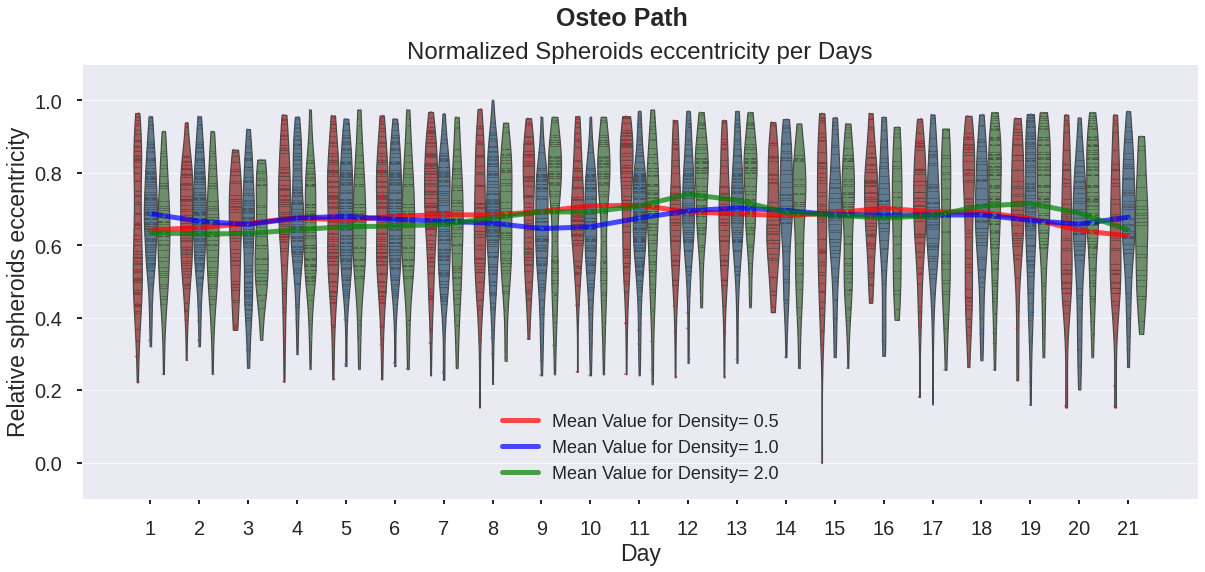

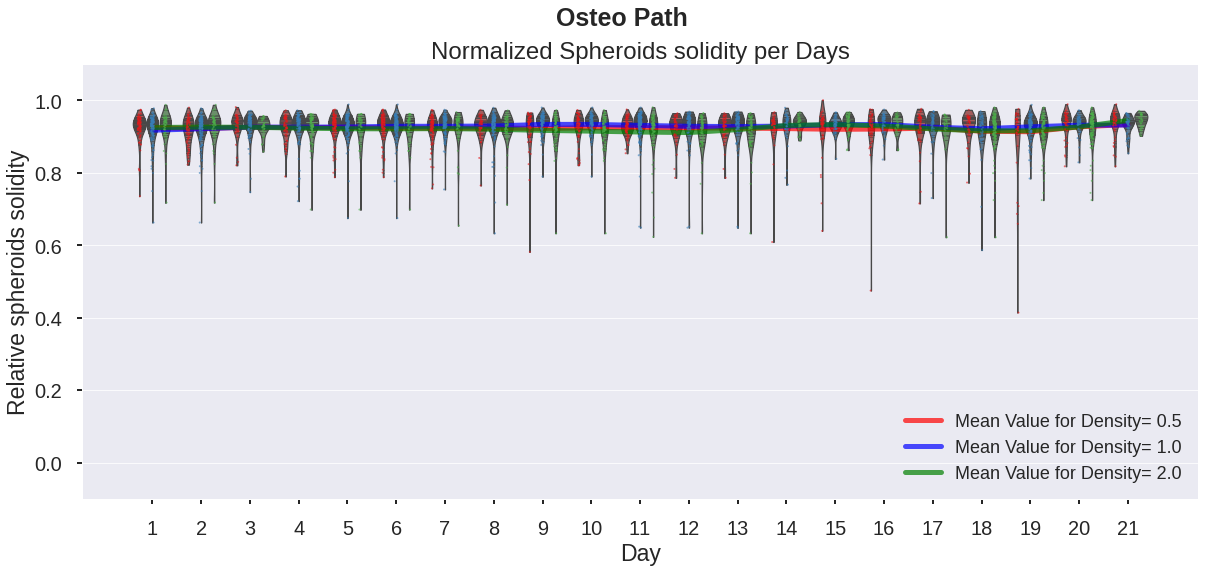

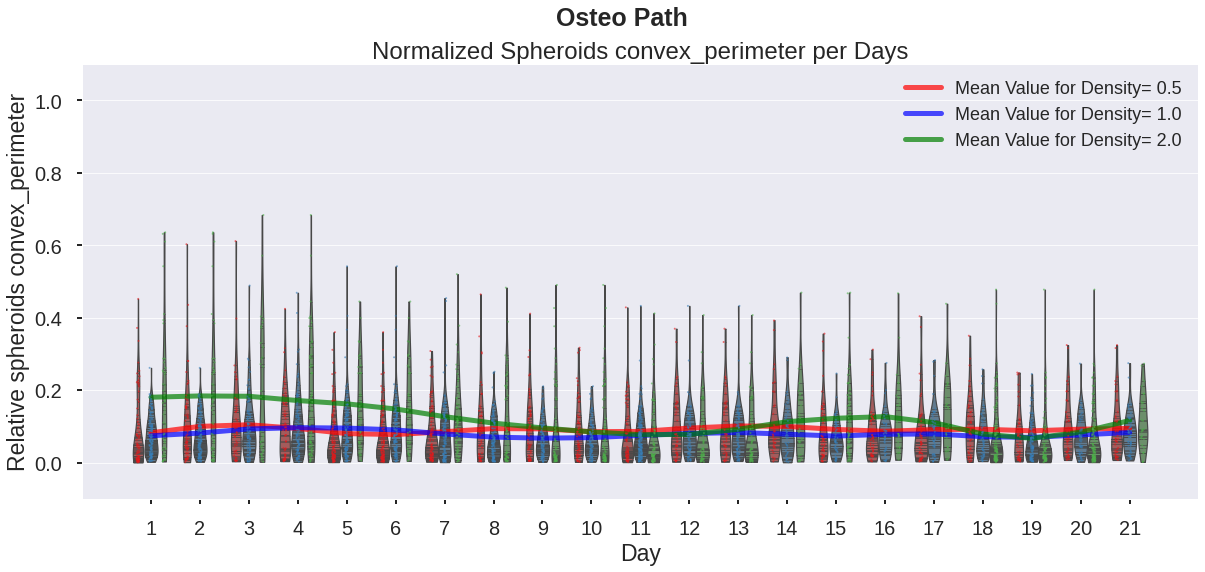

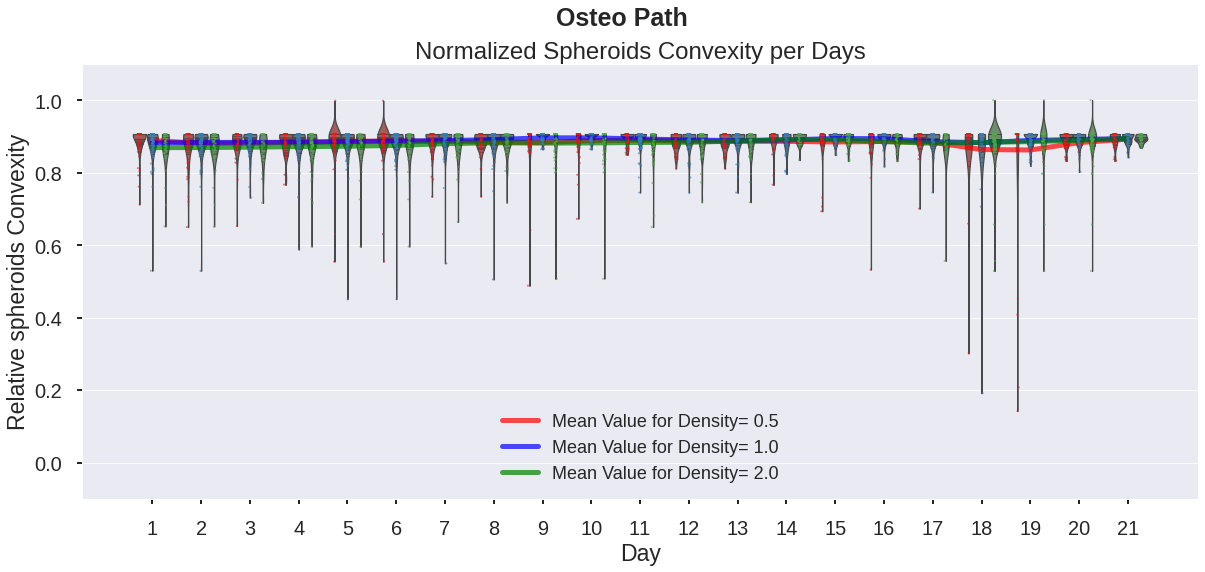

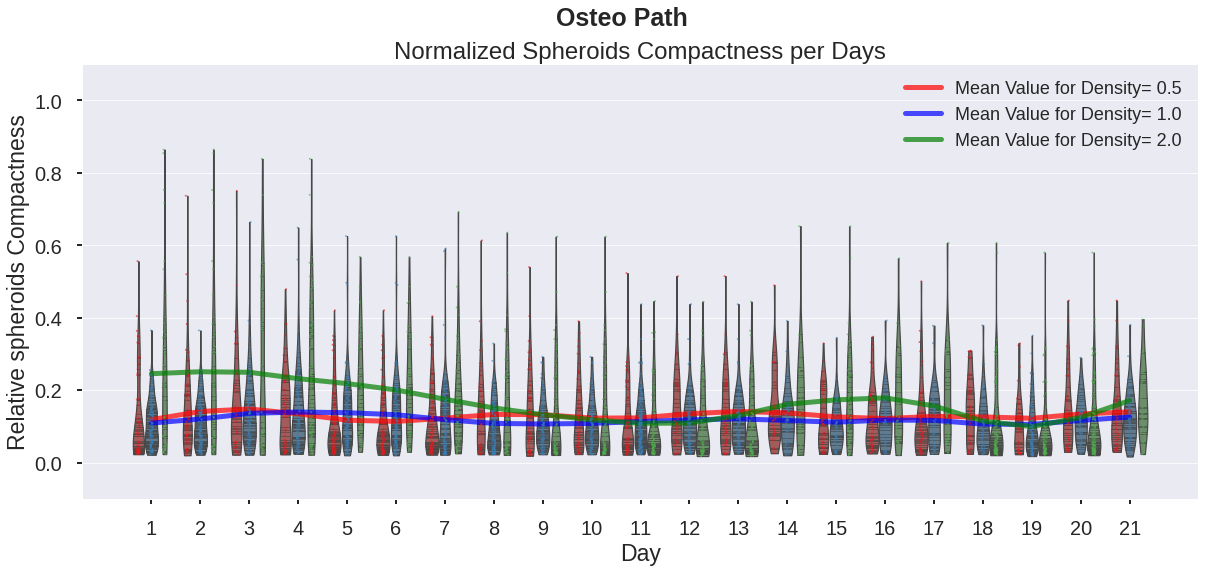

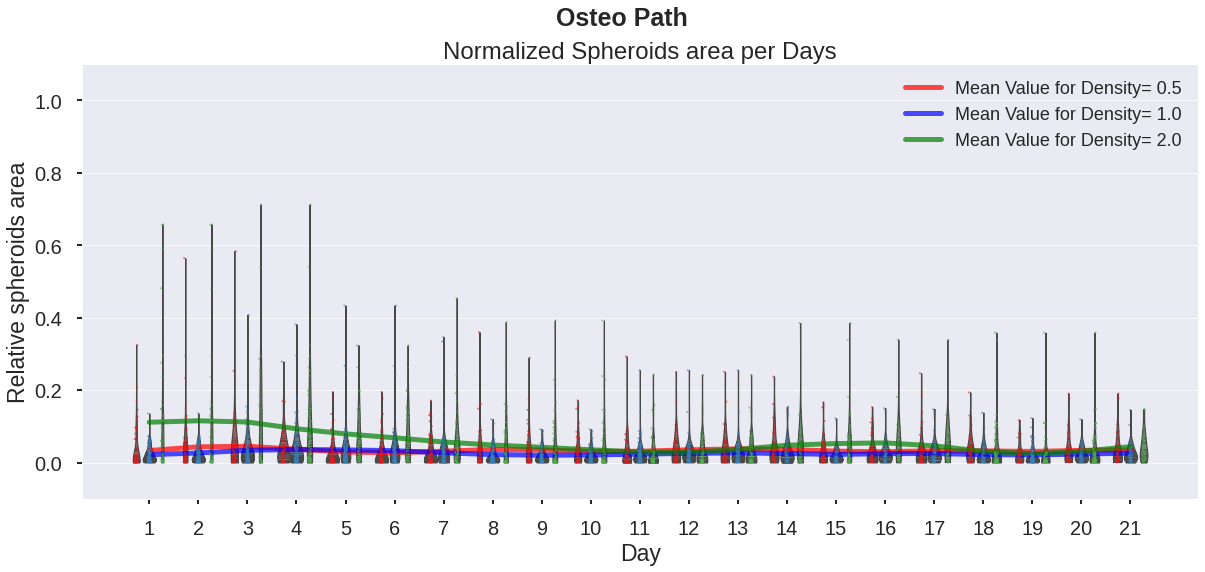

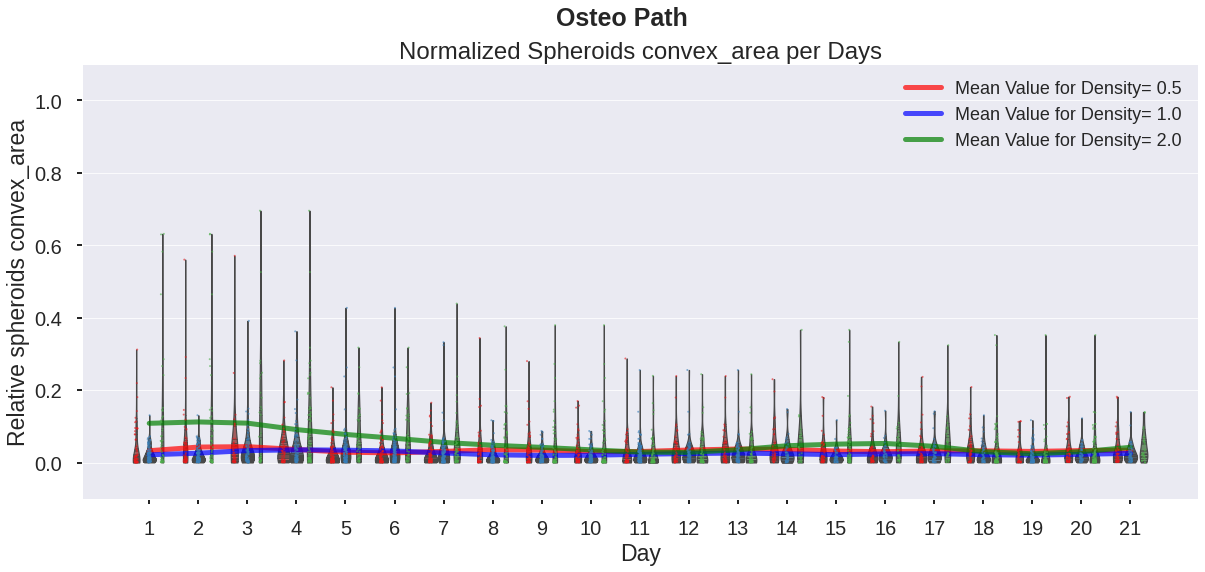

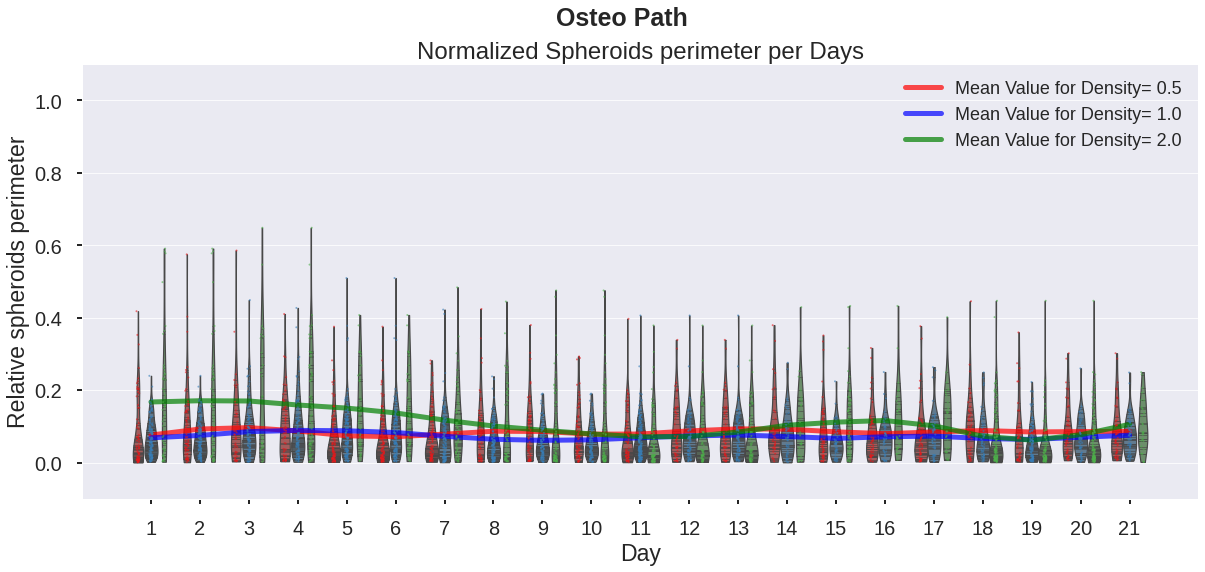

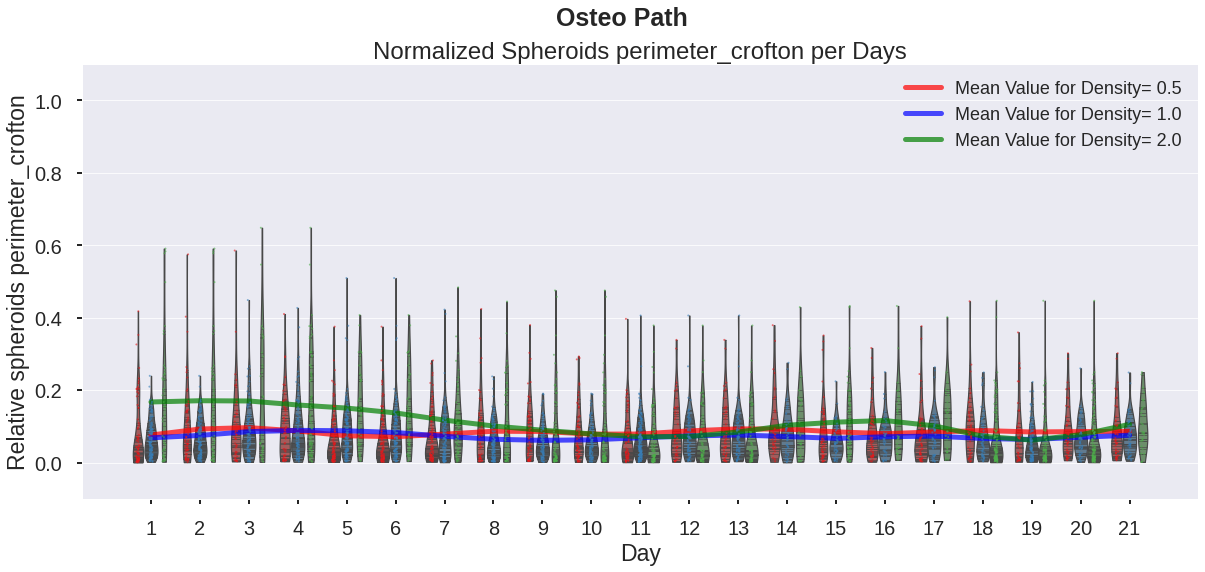

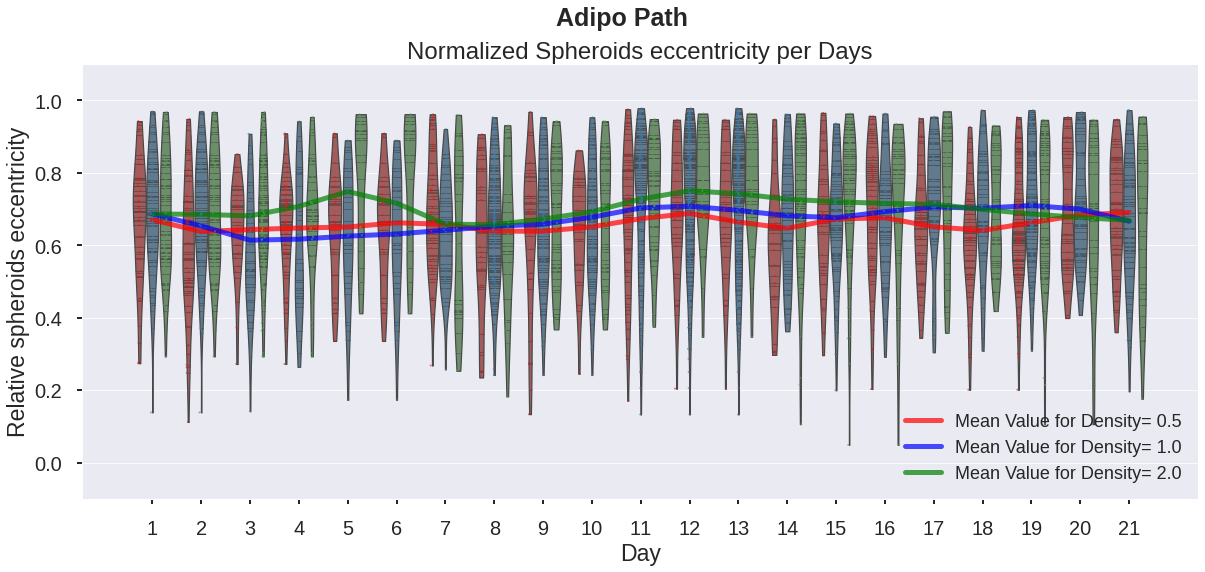

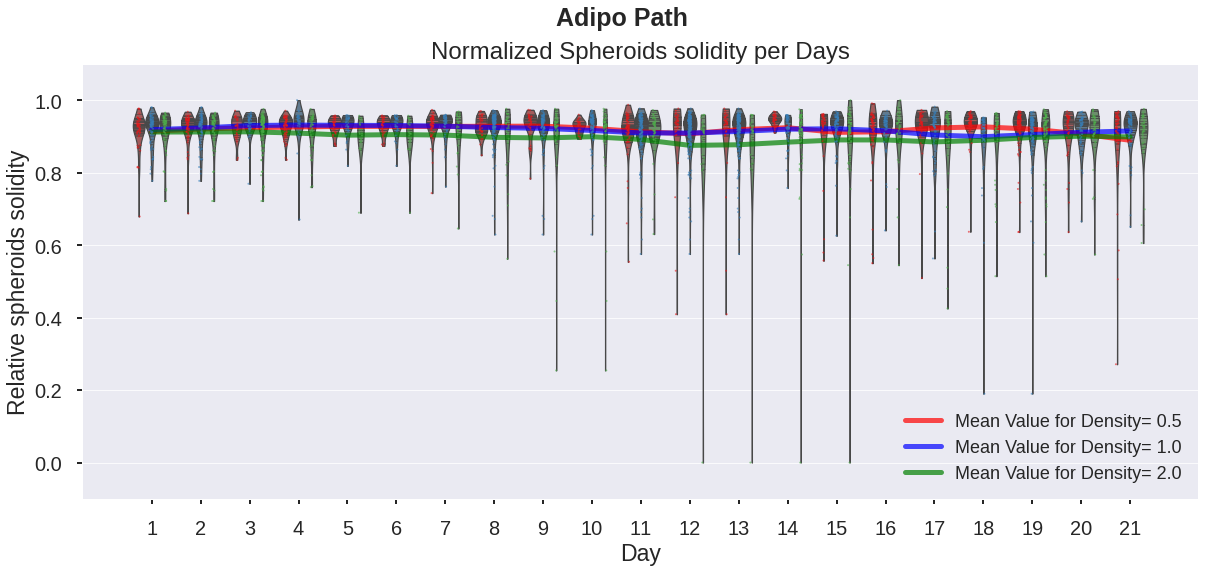

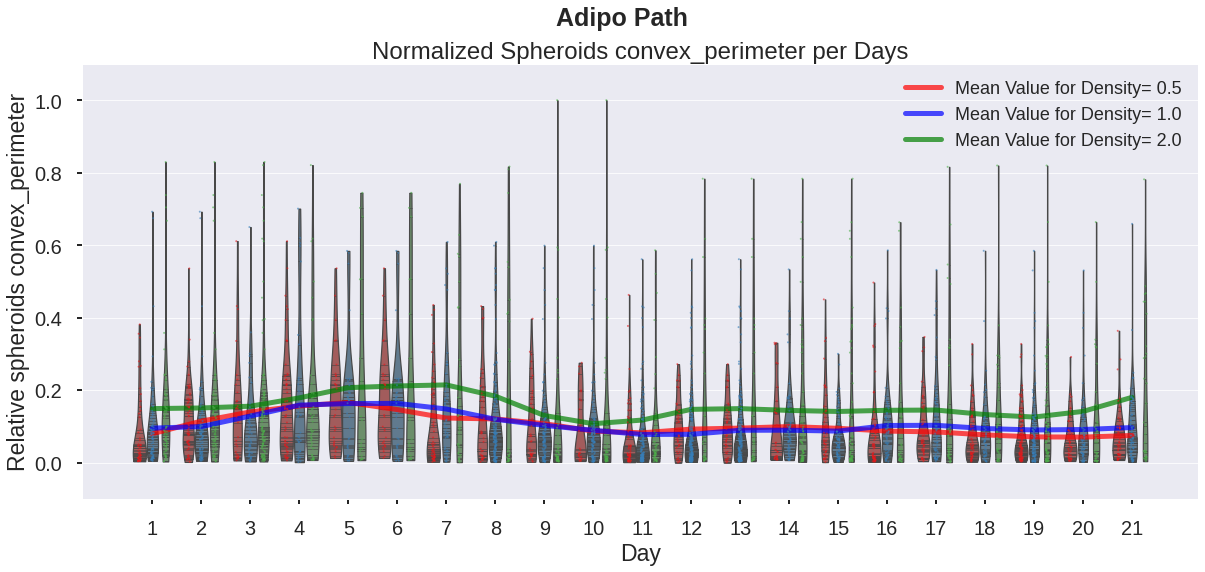

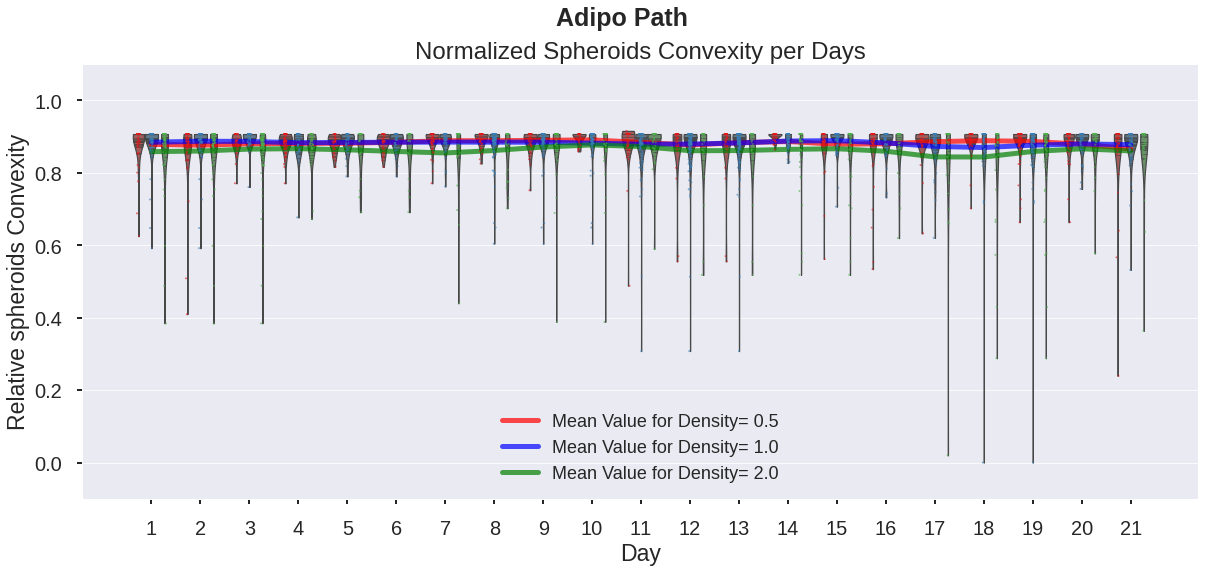

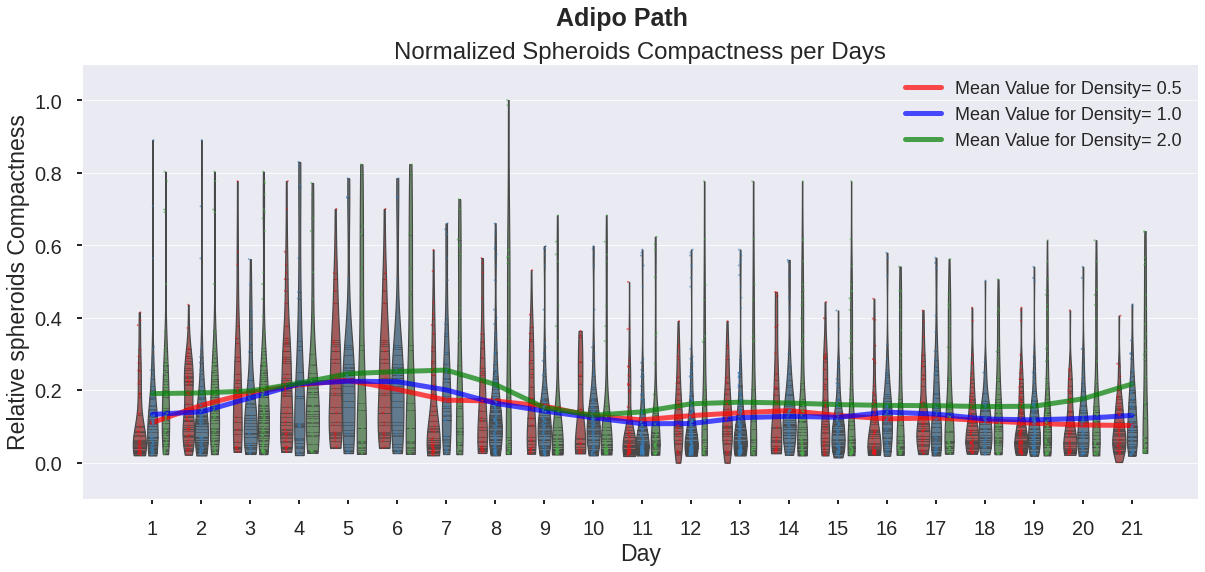

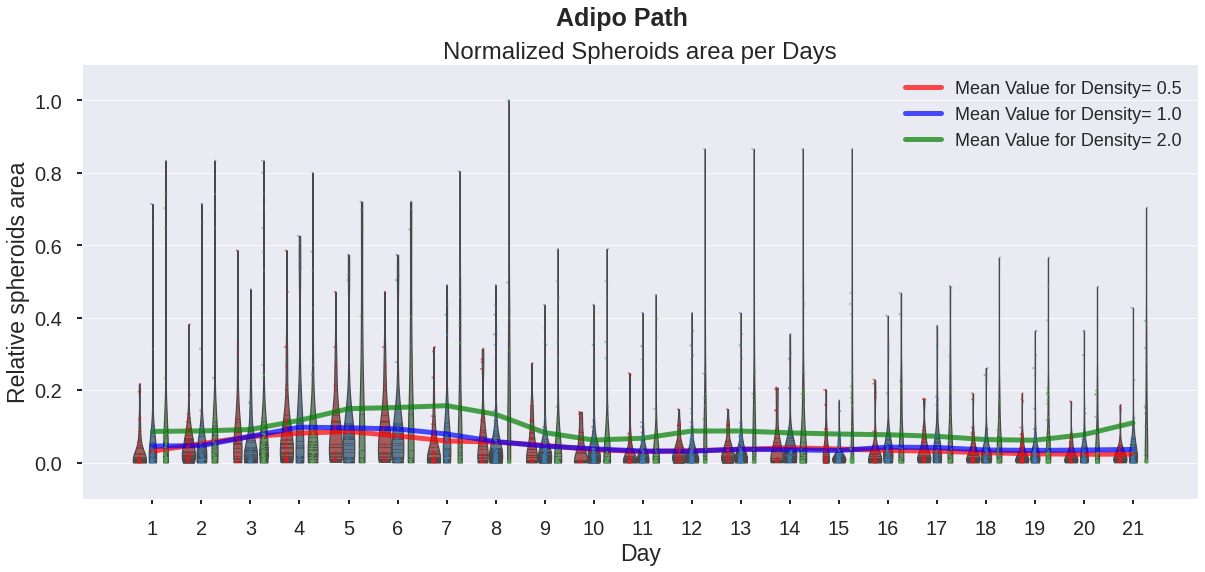

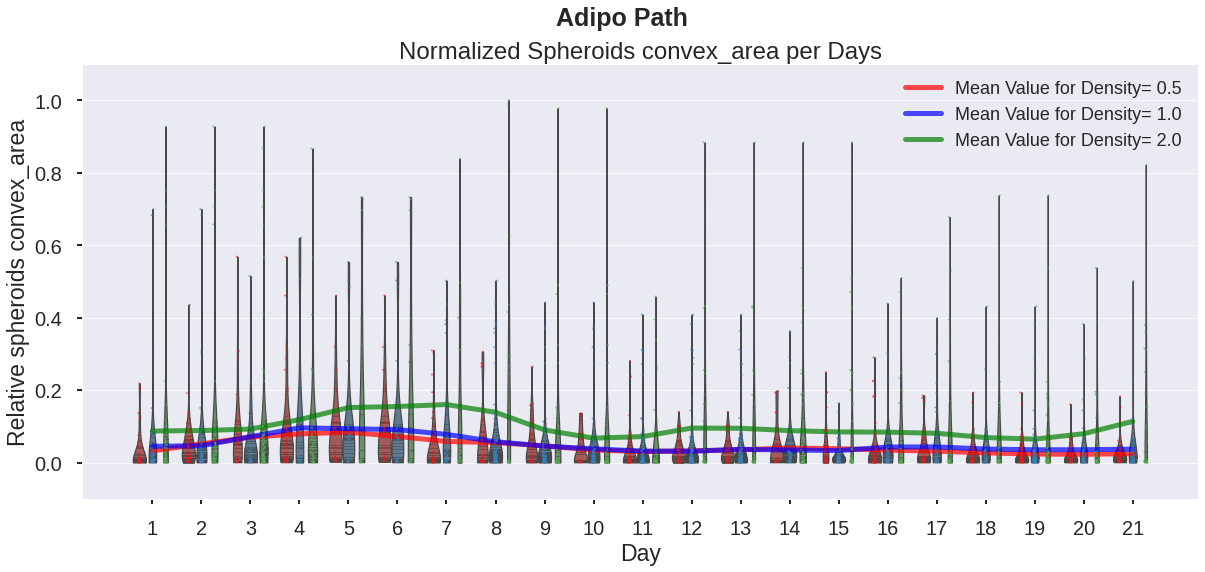

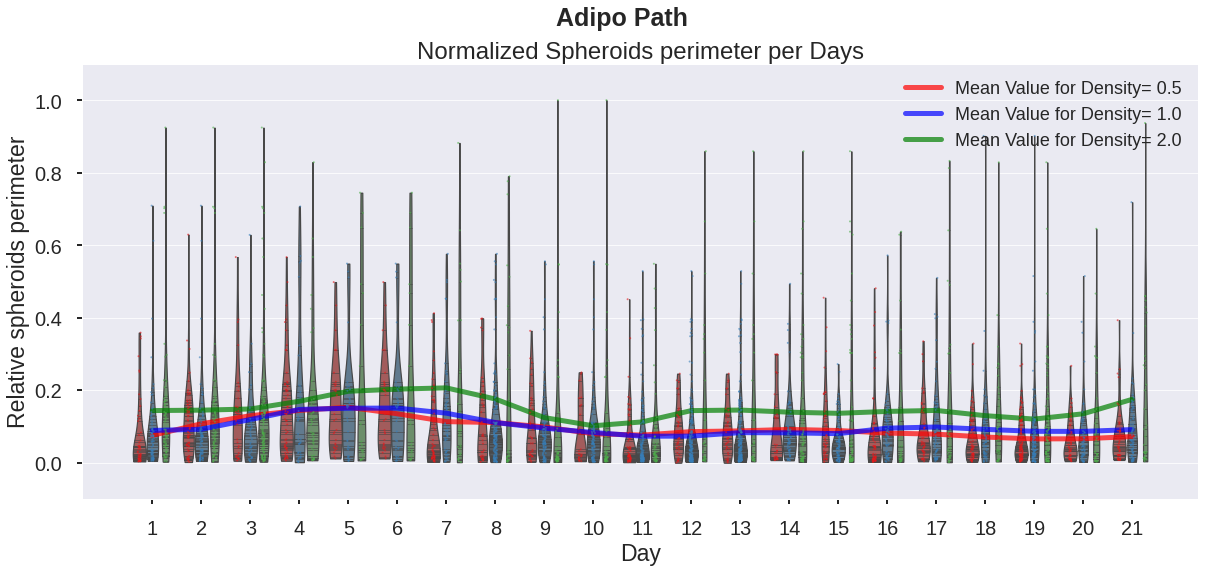

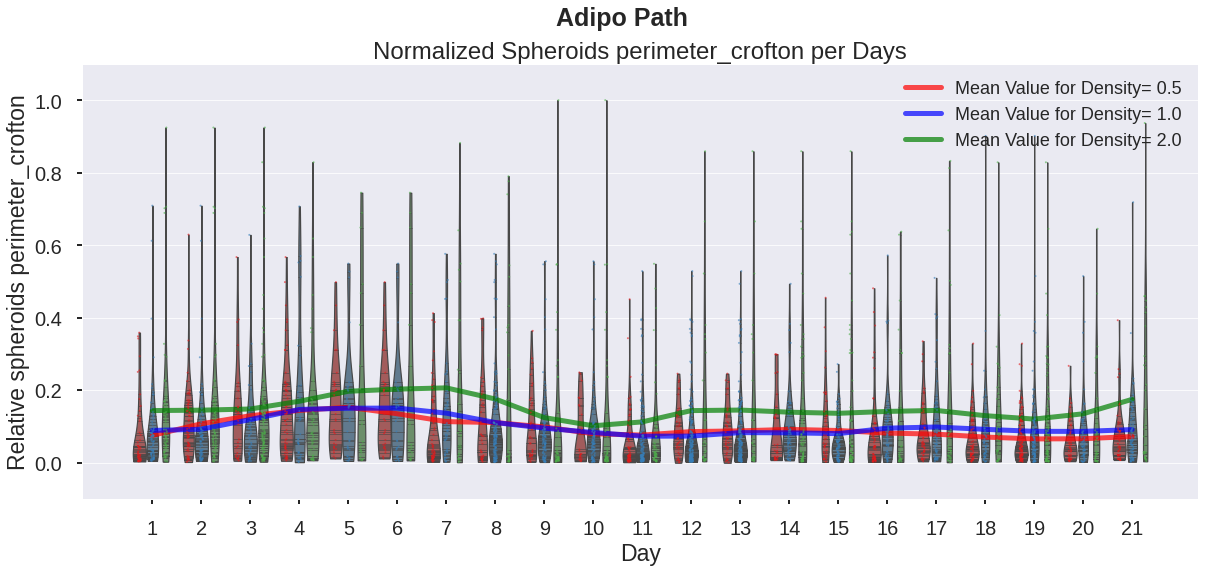

In [ ]:
for dir in DIRS:
    path= f'RESULTS(newViolin)_{ver}/{dir}'
    if not os.path.exists(path):
        os.makedirs(path)
        print(f"The new directory {path} is created!")
    df=dataG[dataG.Dir==dir]

    for PRP in feats:
        fig, ax= plt.subplots(figsize=[20,8])
        sns.violinplot(x="Day", y=PRP, hue='Den', data=df, cut=0, 
                       palette="Set1",
                       saturation=0.35, 
                       alpha= 0.1,
                       inner= "stick"
                       )

        g= sns.stripplot(x="Day", y=PRP, hue='Den', data=df,palette="Set1", 
                      dodge=True, s= 2, alpha= 0.6,)
        
        sns.set_context("paper", rc={'figure.figsize':(20,8), "font.size":100, "axes.titlesize":ttl_size, "axes.labelsize":lbl_size})   
        ax.set_title (f'Normalized Spheroids {PRP} per Days',)
        ax.set_ylabel(f'Relative spheroids {PRP}',)
        ax.tick_params(direction='out',length=5, width=2, pad=15,
                       labelsize=ticlbl_size, )
        plt.ylim([-0.1,1.1])
        fig.suptitle (f'{dir} Path', weight='bold', fontsize= stl_size)

        # Linear Graphs
        DATA= np.zeros([3, len(DAYS)])
        for d in DAYS:
            DATA[0, d-1]= np.mean(df.loc[(df['Den'].astype(float)==0.5) & (df['Day']== d)][f'{PRP}'])
            DATA[1, d-1]= np.mean(df.loc[(df['Den'].astype(float)==1) & (df['Day']== d)][f'{PRP}'])
            DATA[2, d-1]= np.mean(df.loc[(df['Den'].astype(float)==2) & (df['Day']== d)][f'{PRP}'])
        for i, d in enumerate(DENS):
            ax.plot (conv(DATA[i]), linewidth=5, alpha=0.7, label=f'Mean Value for Density= {d}',)
        plt.legend(fontsize=15)

        handles, labels = g.get_legend_handles_labels()
        l = plt.legend(handles[0:3], labels[0:3], fontsize=18)
        # break
        plt.savefig (f'{path}/{PRP}_violinP', dpi=fig.dpi)

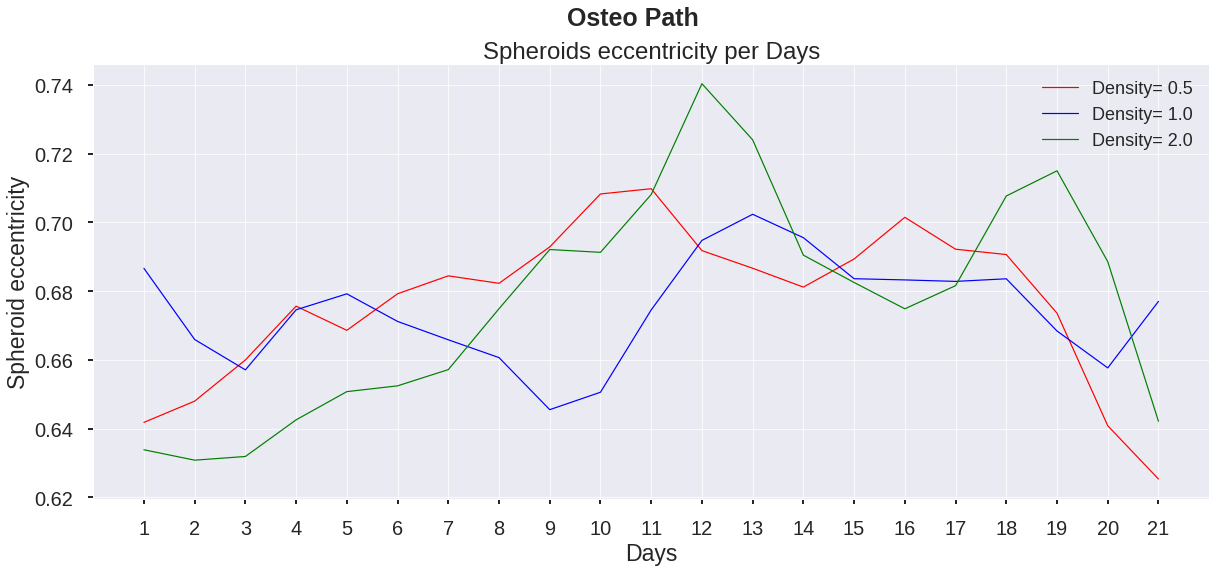

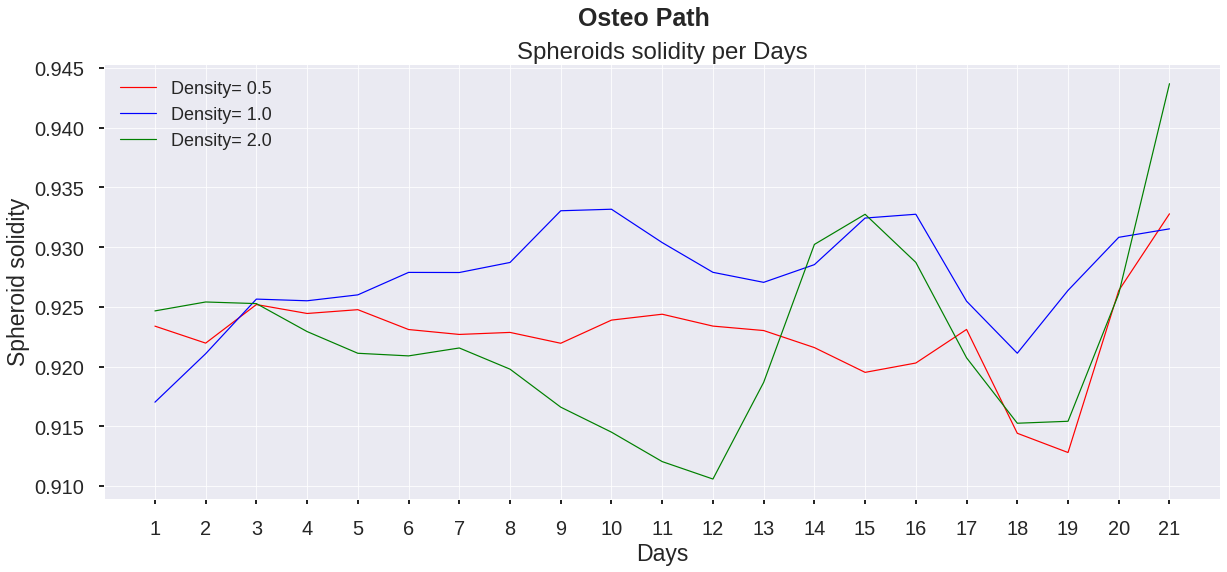

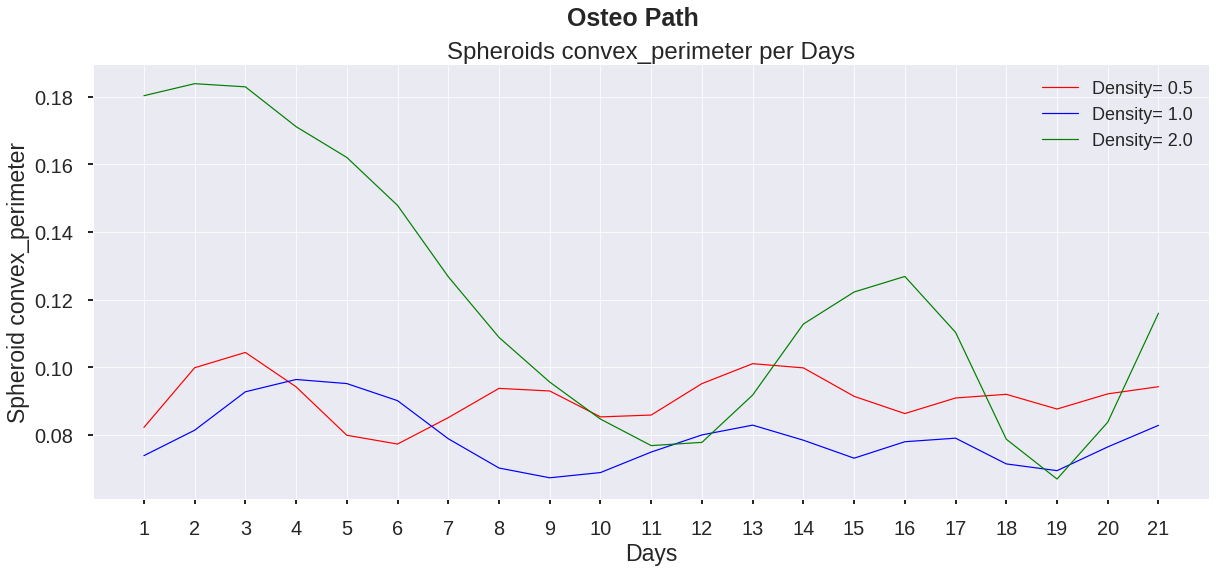

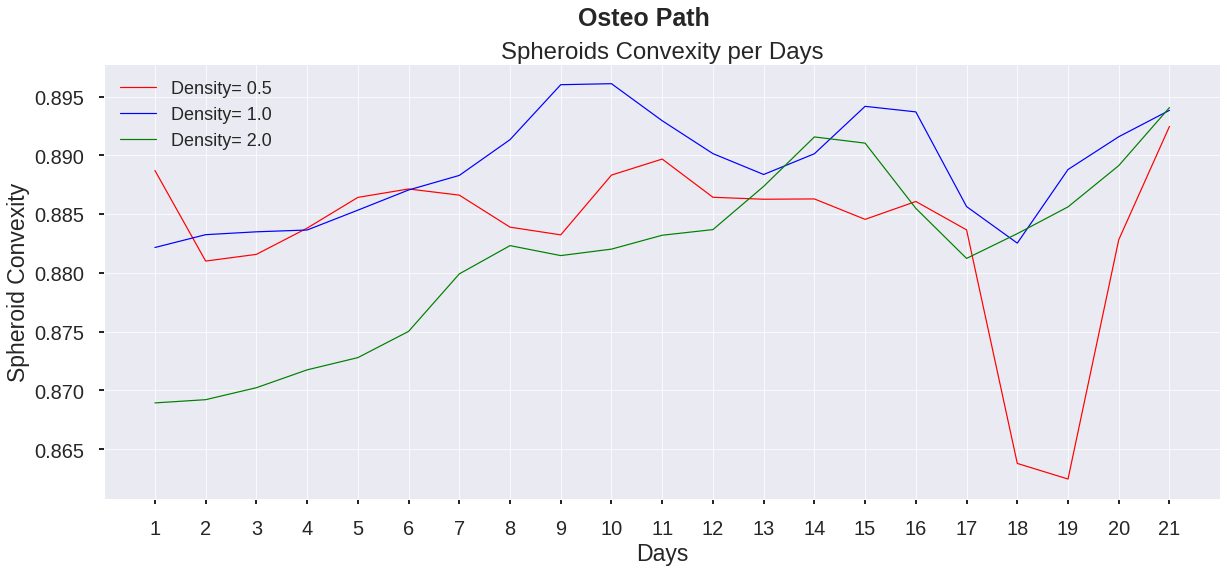

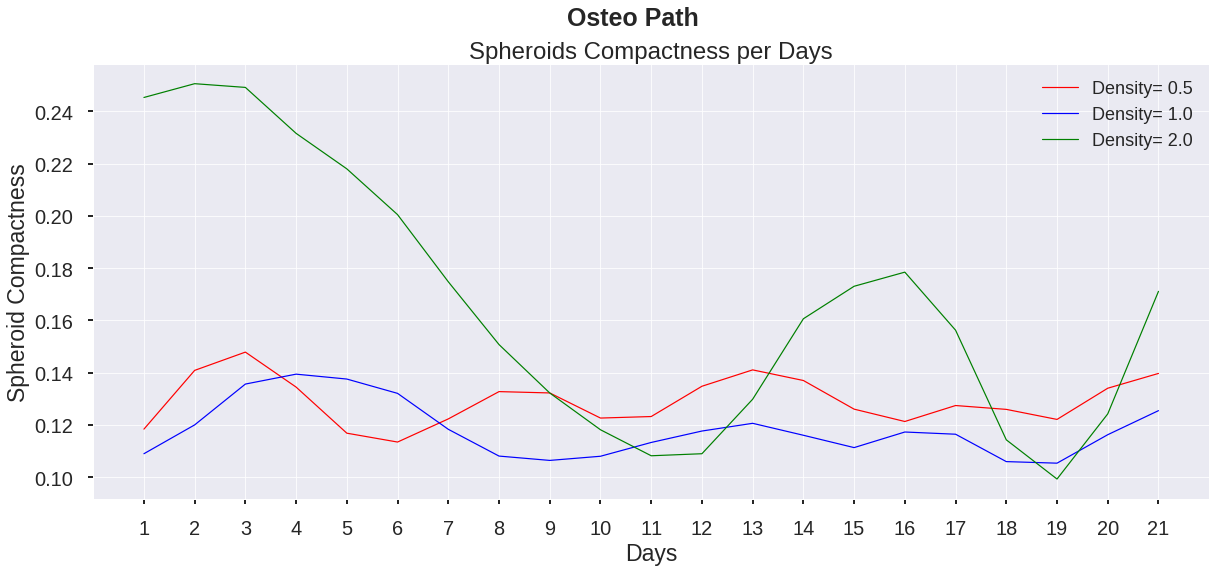

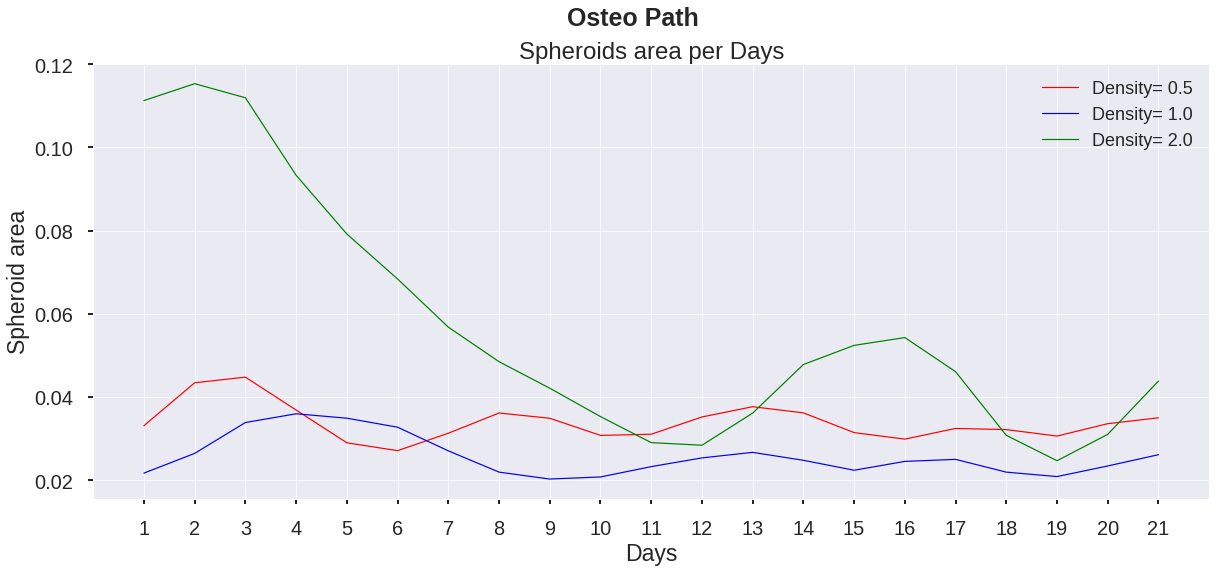

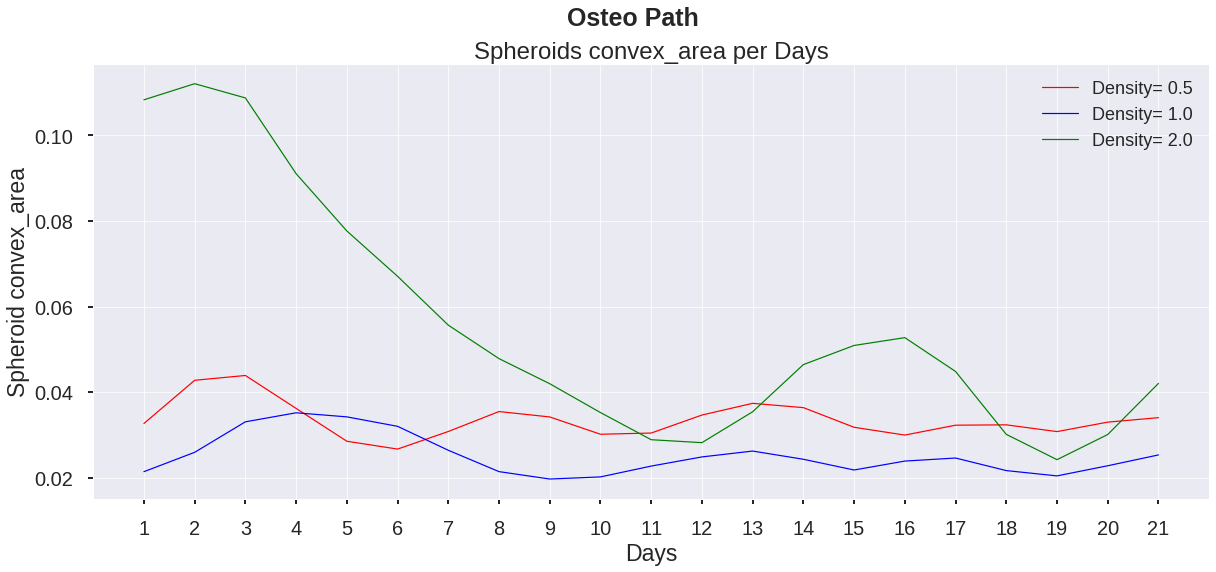

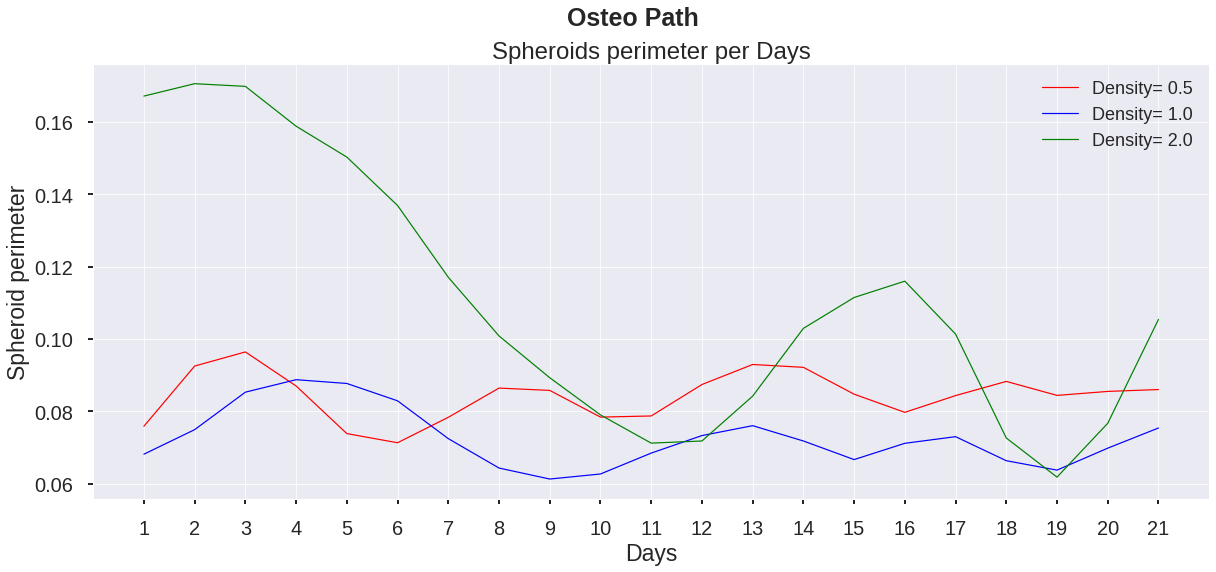

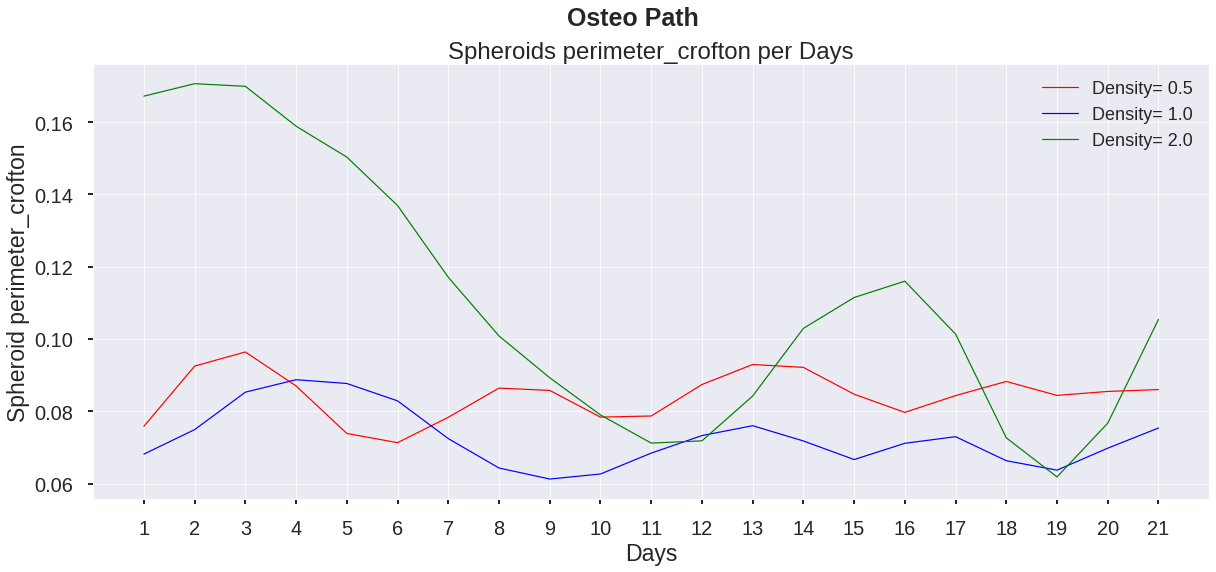

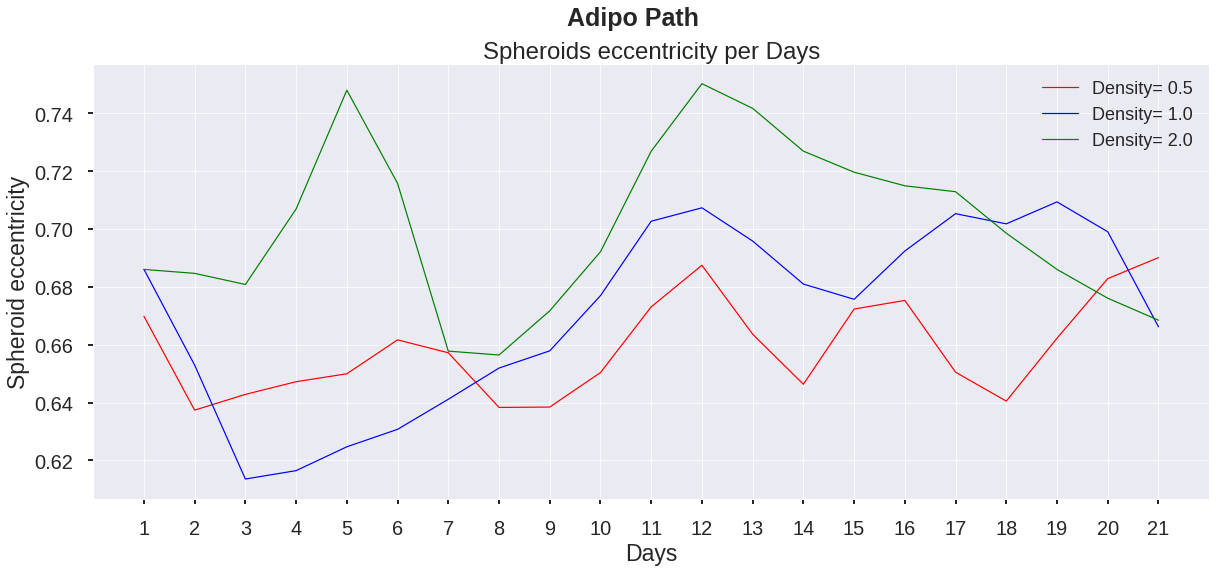

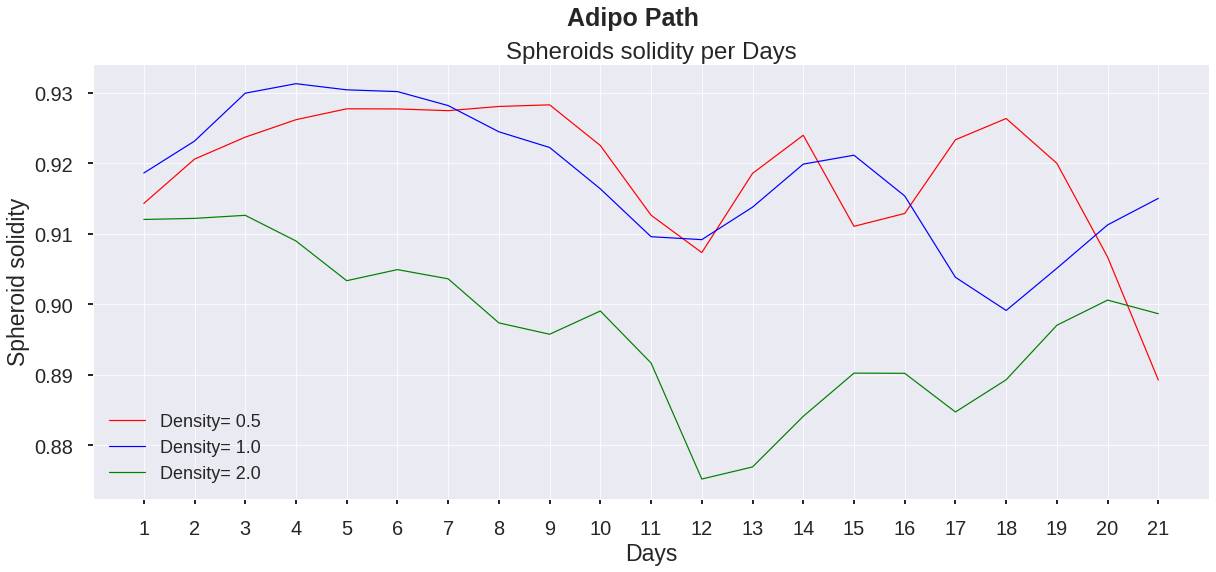

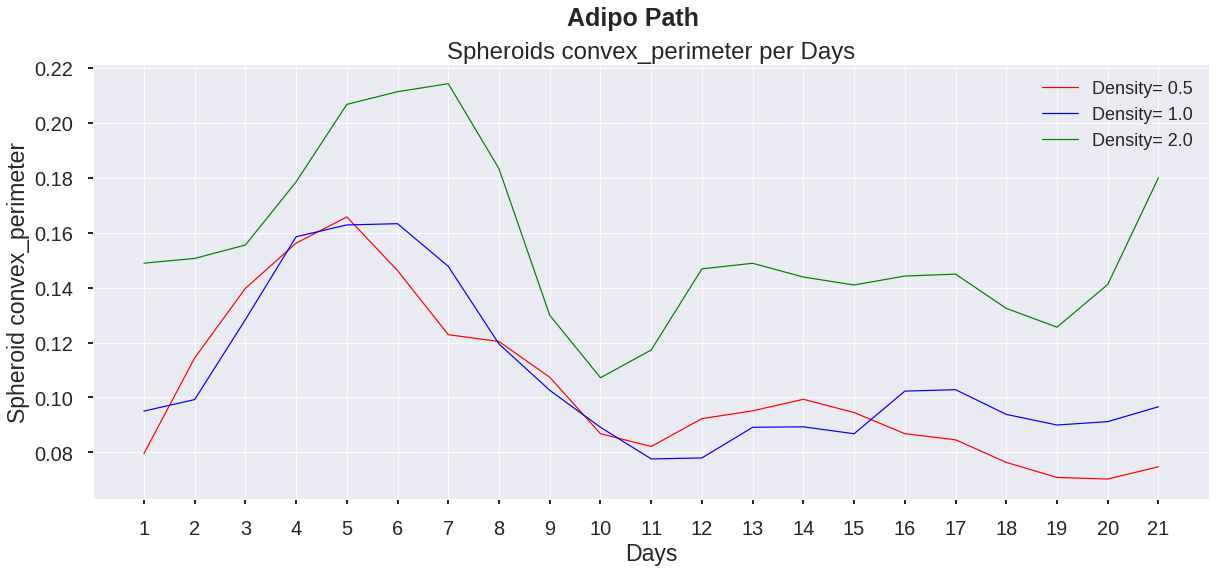

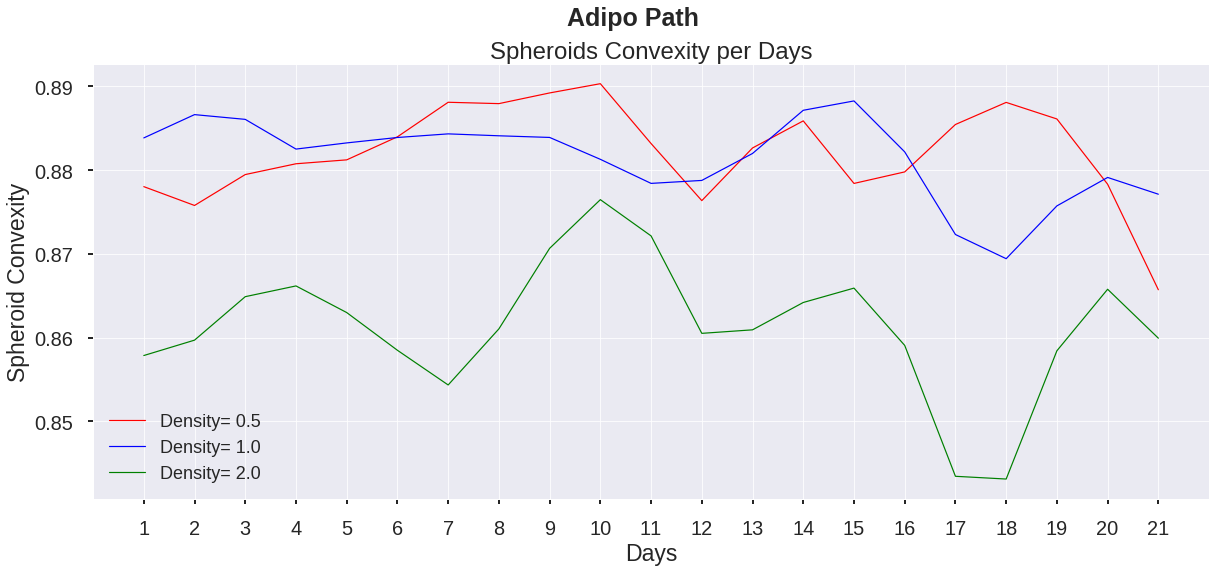

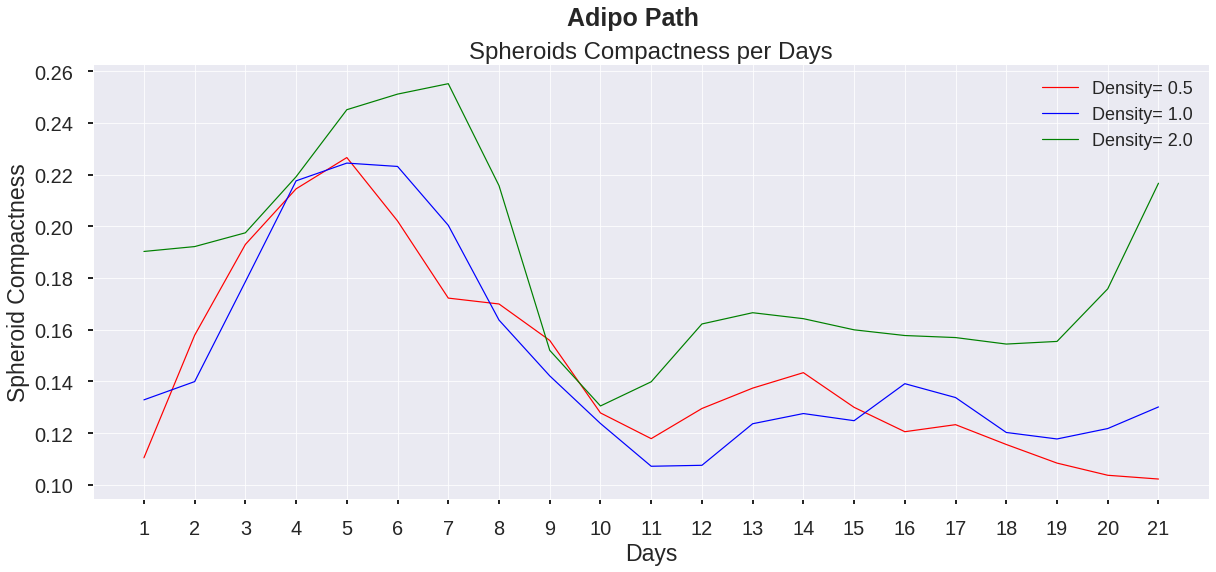

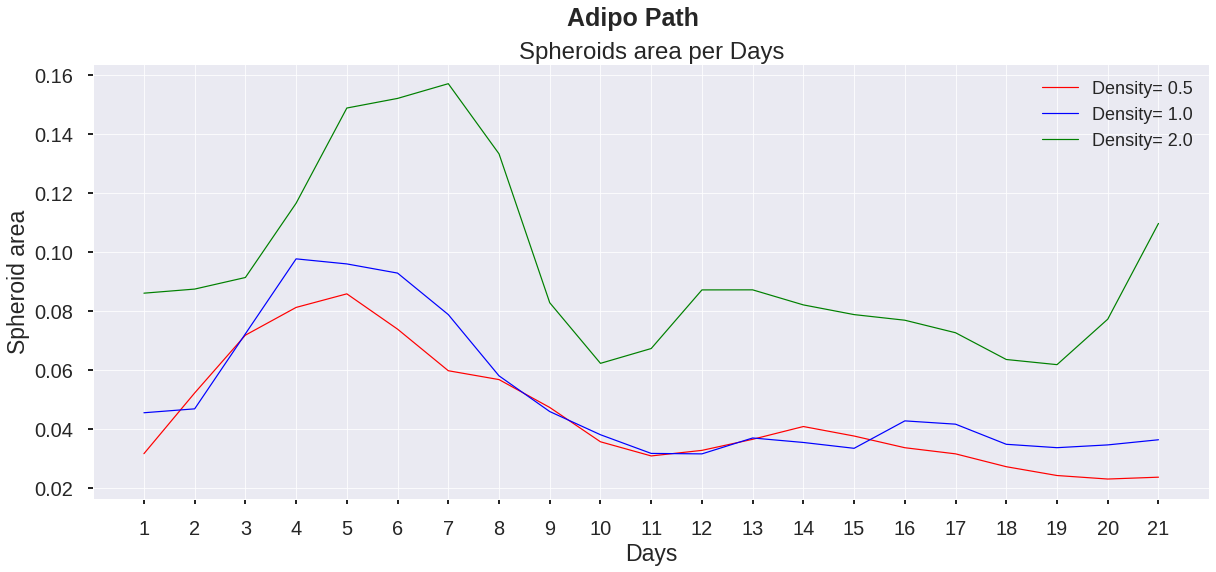

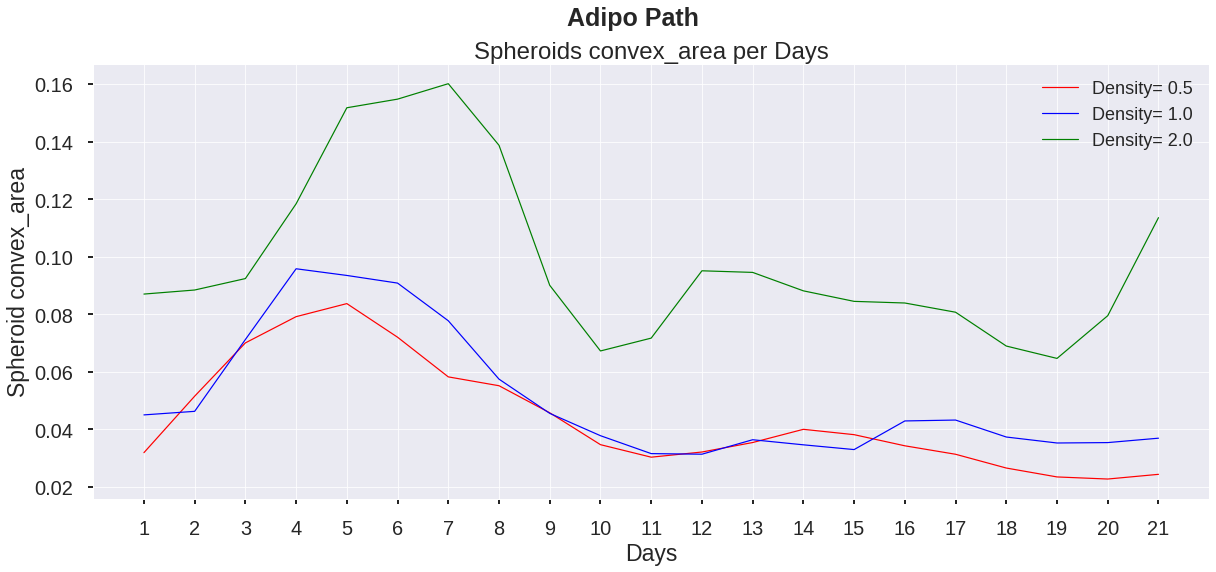

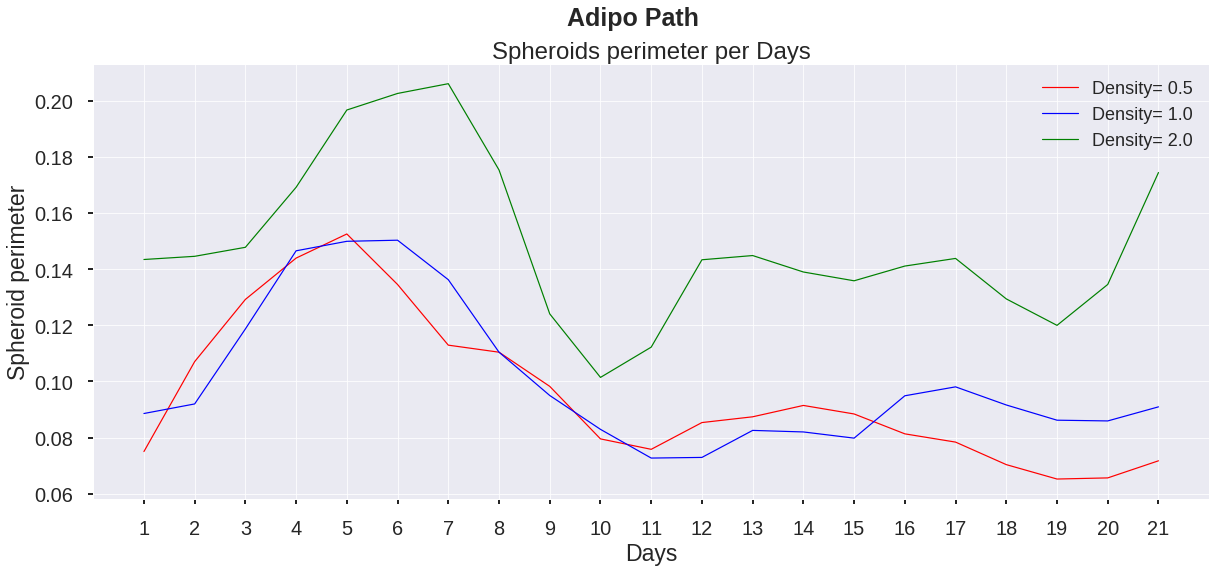

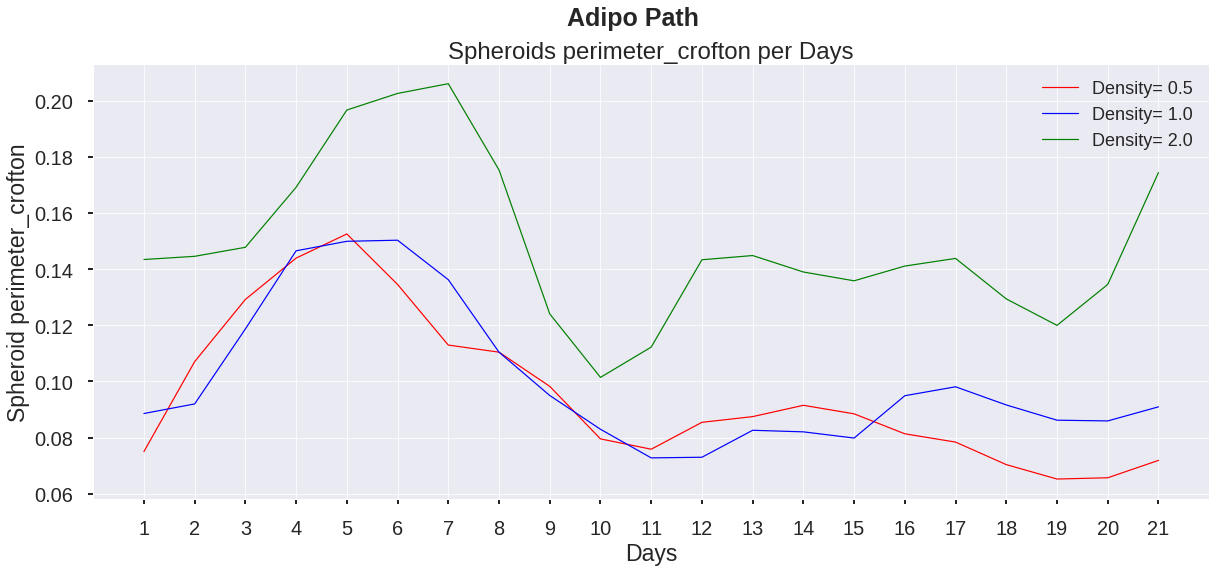

In [ ]:
x_labels= np.arange (1, 22)
for dir in DIRS:
    path= f'RESULTS(newViolin)_{ver}/{dir}'
    df=dataG[dataG.Dir==dir]
    for PRP in feats:
        DATA= np.zeros([3, len(DAYS)])
        for d in DAYS:
            DATA[0, d-1]= np.mean(df.loc[(df['Den'].astype(float)==0.5) & (df['Day']== d)][f'{PRP}'])
            DATA[1, d-1]= np.mean(df.loc[(df['Den'].astype(float)==1) & (df['Day']== d)][f'{PRP}'])
            DATA[2, d-1]= np.mean(df.loc[(df['Den'].astype(float)==2) & (df['Day']== d)][f'{PRP}'])

        fig, ax= plt.subplots(figsize=[20,8])
        for i, d in enumerate(DENS):
            ax.plot (conv(DATA[i]), label=f'Density= {d}')
        ax.set_title (f'Spheroids {PRP} per Days')
        ax.set_ylabel(f'Spheroid {PRP}')

        ax.set_xticks(x_labels-1)
        ax.set_xticklabels(x_labels)
        ax.set_xlabel('Days')
        ax.legend (fontsize= 18)
        fig.suptitle (f'{dir} Path', weight='bold', fontsize= stl_size)
        ax.tick_params(
                       direction='out',
                       length=5,
                       width=2,
                       pad=15,
                       labelsize=ticlbl_size,
                    )
        plt.savefig (f'{path}/{PRP}', dpi=fig.dpi)